In [1]:
pip install transformers

In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the CSV file
data = pd.read_csv("BA_merged_dataset.csv")

example = data['Comment'].values[50]
print(example)

 An excellent flight on BA CityFlyer. The plane was clean, comfortable and spacious. Crew were friendly, and I was very pleasantly surprised to be offered a choice of complimentary alcoholic beverages on this one hour flight! Departure was on-time, and I appreciated the cockpit keeping us updated (and encouraging us to enjoy the views as we came into land at London City). An easy and enjoyable flight - just as it should be!


In [11]:
pip install torch

In [13]:
import torch
print(torch.__version__)

2.5.1+cpu


In [15]:
# Load the model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Define an example input
example = data['Comment'].values[50]

# Tokenize the input
encoded_text = tokenizer(example, return_tensors='pt')

# Run the model
output = model(**encoded_text)

# Extract scores and normalize
scores = output.logits[0].detach().numpy()
scores = softmax(scores)

# Display results
labels = ["negative", "neutral", "positive"]
for label, score in zip(labels, scores):
    print(f"{label}: {score:.4f}")


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\smule\AppData\Local\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smule\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


negative: 0.0013
neutral: 0.0075
positive: 0.9912


In [17]:
# run the roberta model on the entire dataset
# Ensure the Comment column exists
if 'Comment' not in data.columns:
    raise ValueError("The dataset must have a 'Comment' column.")

# Initialize lists to store results
sentiments = []
confidence_scores = []

# Process each comment in the dataset
for idx, comment in enumerate(data['Comment']):
    if pd.isnull(comment) or not isinstance(comment, str):  # Skip empty or non-string comments
        sentiments.append(None)
        confidence_scores.append(None)
        continue

    # Tokenize the comment
    encoded_text = tokenizer(comment, return_tensors='pt', truncation=True, max_length=512)

    # Run the model
    output = model(**encoded_text)

    # Extract scores and apply softmax
    scores = output.logits[0].detach().numpy()
    probabilities = softmax(scores)

    # Get the sentiment label and confidence
    labels = ["negative", "neutral", "positive"]
    sentiment = labels[probabilities.argmax()]
    confidence = probabilities.max()

    sentiments.append(sentiment)
    confidence_scores.append(confidence)

    # Progress update
    if idx % 100 == 0:  # Print progress every 100 comments
        print(f"Processed {idx + 1}/{len(data)} comments...")

# Add results to the dataset
data['Sentiment'] = sentiments
data['Confidence'] = confidence_scores

# Save the updated dataset
data.to_csv("BA_merged_dataset_with_roberta.csv", index=False)
print("Sentiment analysis complete. Results saved to 'BA_merged_dataset_with_roberta.csv'.")


Processed 1/3373 comments...
Processed 101/3373 comments...
Processed 201/3373 comments...
Processed 301/3373 comments...
Processed 401/3373 comments...
Processed 501/3373 comments...
Processed 601/3373 comments...
Processed 701/3373 comments...
Processed 801/3373 comments...
Processed 901/3373 comments...
Processed 1001/3373 comments...
Processed 1101/3373 comments...
Processed 1201/3373 comments...
Processed 1301/3373 comments...
Processed 1401/3373 comments...
Processed 1501/3373 comments...
Processed 1601/3373 comments...
Processed 1701/3373 comments...
Processed 1801/3373 comments...
Processed 1901/3373 comments...
Processed 2001/3373 comments...
Processed 2101/3373 comments...
Processed 2201/3373 comments...
Processed 2301/3373 comments...
Processed 2401/3373 comments...
Processed 2501/3373 comments...
Processed 2601/3373 comments...
Processed 2701/3373 comments...
Processed 2801/3373 comments...
Processed 2901/3373 comments...
Processed 3001/3373 comments...
Processed 3101/3373 

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pandas wordcloud matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smule\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


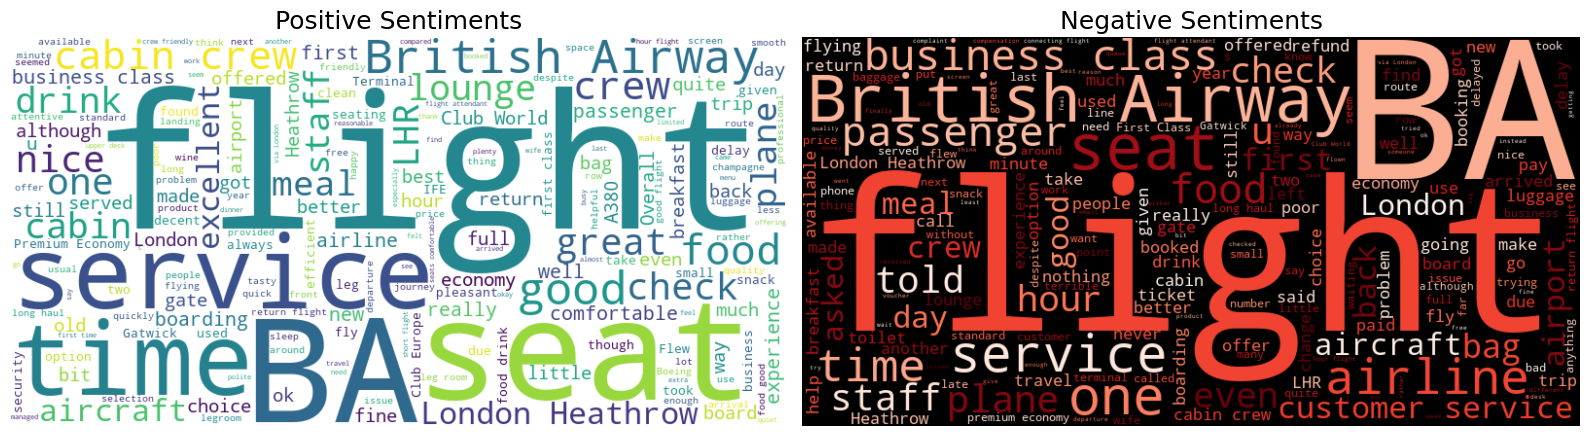

In [27]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import nltk

# Ensure NLTK resources are available
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv("BA_merged_dataset_with_roberta.csv")

# Filter positive and negative comments
positive_comments = data[data['Sentiment'] == 'positive']['Comment']
negative_comments = data[data['Sentiment'] == 'negative']['Comment']

# Combine all positive and negative comments into single strings
positive_text = " ".join(positive_comments.dropna())
negative_text = " ".join(negative_comments.dropna())

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
def clean_text(text):
    return " ".join([
        word for word in text.split()
        if word.lower() not in stop_words and word not in string.punctuation
    ])

positive_text = clean_text(positive_text)
negative_text = clean_text(negative_text)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Visualize the word clouds
plt.figure(figsize=(16, 8))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Sentiments", fontsize=18)
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Sentiments", fontsize=18)
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()
